<a href="https://colab.research.google.com/github/jonatasbx/Curso-CDIA/blob/main/tratamento_sus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notebook para análise do banco de dados do SIH-SUS.

### Para a análise pretendida, a base foi filtrada com base na variável especialidade = 2 e raça/cor = preto

### De acordo com o historico de dados qual a previsão do custo de internação de uma pessoa preta na especialidade de obstreticia

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [231]:
pd.set_option('display.float_format', '{:.2f}'.format)
sih_sus = pd.read_excel('base_tratada_pretos.xlsx')

In [232]:
sih_sus.head()

,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,CEP,MUNIC_RES,NASC,SEXO,DIAR_ACOM,QT_DIARIAS,PROC_SOLIC,PROC_REA,VAL_SH,VAL_TOT,VAL_UTI,US_TOT,DT_INTER,DT_SAIDA,DIAG_PRINC,DIAG_SECUN,COBRANCA,NATUREZA,NAT_JUR,GESTAO,RUBRICA,IND_VDRL,MUNIC_MOV,COD_IDADE,IDADE,DIAS_PERM,MORTE,NACIONAL,NUM_PROC,CAR_INT,HOMONIMO,NUM_FILHOS,INSTRU,CID_NOTIF,CONTRACEP1,CONTRACEP2,GESTRISCO,INSC_PN,SEQ_AIH5,CBOR,CNAER,VINCPREV,GESTOR_COD,GESTOR_TP,GESTOR_CPF,GESTOR_DT,CNES,CNPJ_MANT,INFEHOSP,CID_ASSO,CID_MORTE,COMPLEX,FINANC,FAEC_TP,REGCT,RACA_COR,ETNIA,SEQUENCIA,REMESSA,AUD_JUST,SIS_JUST,VAL_SH_FED,VAL_SP_FED,VAL_SH_GES,VAL_SP_GES,VAL_UCI
0,120000,2024,4,2,4034526000909.00,69934000,120025,20060201,3,1,1,310010039,310010039,276.60,555.90,0.00,106.08,20240421,20240422,O800,0,61,0,1023,2,0,1,120010,4,18,1,0,10,NaN,2,0,0,0,NaN,0,0,1,0,0,0,0,0,0,0,0,NaN,2001500,4034526000143.00,NaN,0,0,2,6,NaN,0,2,0,183,HE12000001N202404.DTS,NaN,NaN,0.00,0.00,0.00,0.00,0.00
1,120000,2024,4,2,4034526000909.00,69932000,120010,20041016,3,2,2,411010034,411010034,412.68,679.11,0.00,129.60,20240408,20240410,O821,0,61,0,1023,2,0,1,120010,4,19,2,0,10,NaN,2,0,0,0,NaN,0,0,1,0,0,0,0,0,0,0,0,NaN,2001500,4034526000143.00,NaN,0,0,2,6,NaN,0,2,0,190,HE12000001N202404.DTS,NaN,NaN,0.00,0.00,0.00,0.00,0.00
2,120000,2024,4,2,4034526000909.00,69932000,120010,19940809,3,0,3,411010034,411010034,396.68,663.11,0.00,126.54,20240331,20240403,O821,0,61,0,1023,2,0,1,120010,4,29,3,0,10,NaN,2,0,0,0,NaN,0,0,1,0,0,0,0,0,0,0,0,NaN,2001500,4034526000143.00,NaN,0,0,2,6,NaN,0,2,0,194,HE12000001N202404.DTS,NaN,NaN,0.00,0.00,0.00,0.00,0.00
3,270000,2024,4,2,NaN,57490000,270010,20020831,3,1,1,310010039,310010039,284.94,525.94,0.00,100.37,20240424,20240425,O800,0,61,0,1023,2,0,0,270240,4,21,1,0,10,NaN,2,0,0,0,NaN,0,0,1,0,0,0,0,0,0,0,0,NaN,806285,12200259000165.00,NaN,0,0,2,6,NaN,0,2,0,759,HE27000001N202404.DTS,NaN,NaN,0.00,0.00,0.00,0.00,0.00
4,270030,2024,4,2,24177305000131.00,57302205,270030,19870319,3,1,1,310010047,310010047,443.49,751.47,0.00,143.41,20240411,20240412,O800,0,61,0,3999,1,0,1,270030,4,37,1,0,10,NaN,2,0,0,0,NaN,0,0,1,0,0,0,0,0,0,0,0,NaN,2005050,NaN,NaN,0,0,2,6,NaN,0,2,0,212,HM27003001N202404.DTS,NaN,NaN,0.00,0.00,0.00,0.00,0.00


In [233]:
pd.options.display.max_columns = 113
sih_sus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 71 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UF_ZI       8666 non-null   int64  
 1   ANO_CMPT    8666 non-null   int64  
 2   MES_CMPT    8666 non-null   int64  
 3   ESPEC       8666 non-null   int64  
 4   CGC_HOSP    5216 non-null   float64
 5   CEP         8666 non-null   int64  
 6   MUNIC_RES   8666 non-null   int64  
 7   NASC        8666 non-null   int64  
 8   SEXO        8666 non-null   int64  
 9   DIAR_ACOM   8666 non-null   int64  
 10  QT_DIARIAS  8666 non-null   int64  
 11  PROC_SOLIC  8666 non-null   int64  
 12  PROC_REA    8666 non-null   int64  
 13  VAL_SH      8666 non-null   float64
 14  VAL_TOT     8666 non-null   float64
 15  VAL_UTI     8666 non-null   float64
 16  US_TOT      8666 non-null   float64
 17  DT_INTER    8666 non-null   int64  
 18  DT_SAIDA    8666 non-null   int64  
 19  DIAG_PRINC  8666 non-null  

In [234]:
sih_sus_tratada = sih_sus.drop(['CGC_HOSP','CNPJ_MANT','AUD_JUST','SIS_JUST','FAEC_TP','GESTOR_DT','INFEHOSP','CID_NOTIF','NUM_PROC','DIAG_PRINC','REMESSA','CEP', 'MUNIC_RES','NASC','DIAR_ACOM','SEXO','PROC_SOLIC','VAL_UTI','VAL_SH','DT_INTER', 'DT_SAIDA','COBRANCA','RUBRICA','MUNIC_MOV','NACIONAL','CAR_INT', 'HOMONIMO', 'NUM_FILHOS', 'INSTRU', 'INSC_PN', 'SEQ_AIH5', 'CBOR', 'CNAER',
       'VINCPREV', 'GESTOR_COD', 'GESTOR_TP', 'GESTOR_CPF', 'CNES', 'CID_ASSO','CID_MORTE', 'COMPLEX', 'FINANC', 'REGCT','SEQUENCIA', 'VAL_SH_FED',
       'VAL_SP_FED', 'VAL_SH_GES', 'VAL_SP_GES', 'VAL_UCI','DIAS_PERM','US_TOT','MES_CMPT','ANO_CMPT','ESPEC','NATUREZA','NAT_JUR','COD_IDADE','DIAG_SECUN','RACA_COR','ETNIA','UF_ZI'], axis=1)

In [235]:
sih_sus_tratada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   QT_DIARIAS  8666 non-null   int64  
 1   PROC_REA    8666 non-null   int64  
 2   VAL_TOT     8666 non-null   float64
 3   GESTAO      8666 non-null   int64  
 4   IND_VDRL    8666 non-null   int64  
 5   IDADE       8666 non-null   int64  
 6   MORTE       8666 non-null   int64  
 7   CONTRACEP1  8666 non-null   int64  
 8   CONTRACEP2  8666 non-null   int64  
 9   GESTRISCO   8666 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 677.2 KB


### Todas as variáveis com valores nulos foram retirados assim, como as variáveis categoricas.

## Inicio da EDA

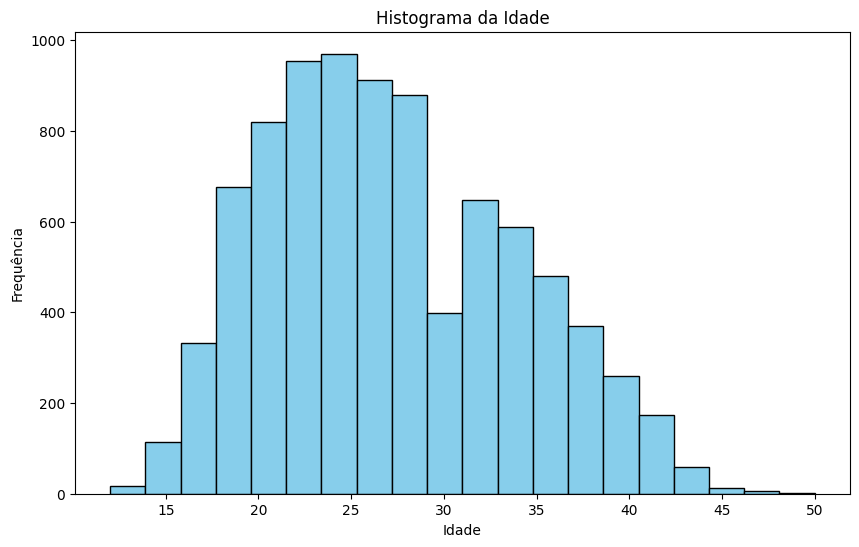

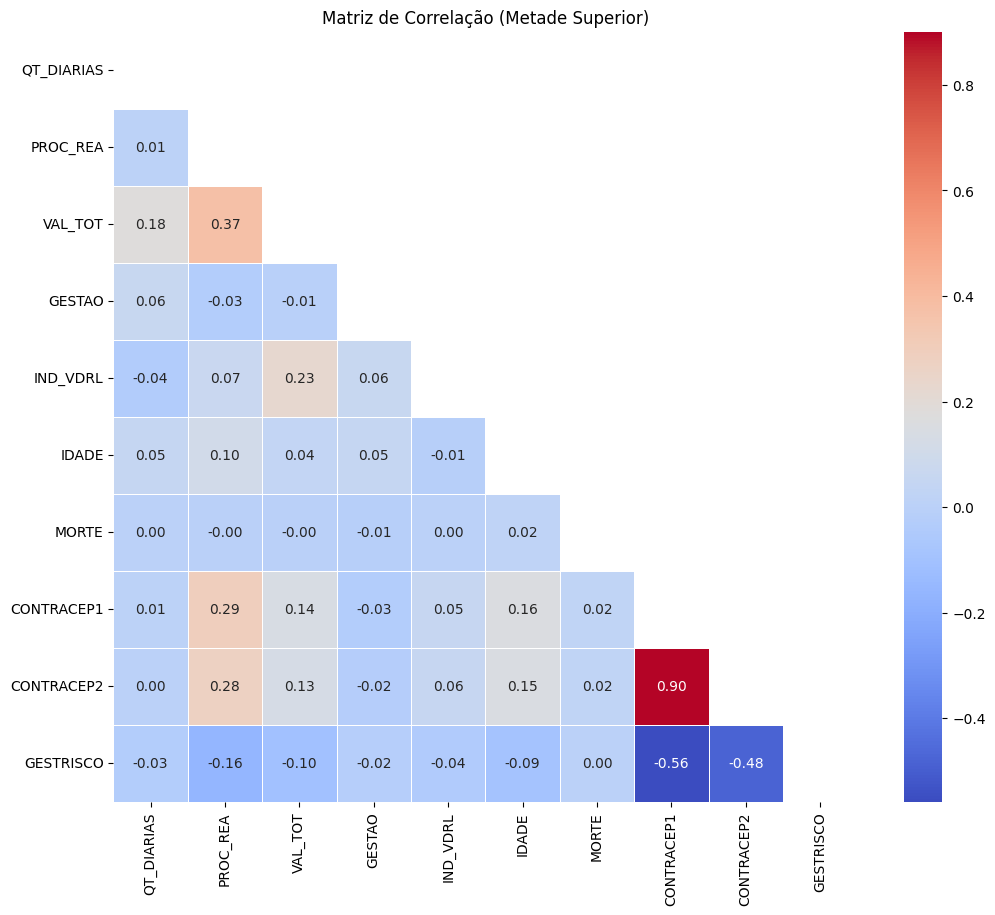

In [236]:
import seaborn as sns

# Assuming sih_sus_tratada is already defined as in the previous code

# Example 1: Histogram of 'IDADE'
plt.figure(figsize=(10, 6))
plt.hist(sih_sus_tratada['IDADE'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Histograma da Idade')
plt.show()


# Example 2: Scatter plot of 'VAL_SH' vs 'IDADE'
#plt.figure(figsize=(10, 6))
#plt.scatter(sih_sus_tratada['IDADE'], sih_sus_tratada['VAL_SH'], alpha=0.5)
#plt.xlabel('Idade')
#plt.ylabel('Valor da Internação (VAL_SH)')
#plt.title('Valor da Internação vs Idade')
#plt.show()


# Example 4: Correlation matrix heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Exemplo 4: Matriz de correlação com heatmap
plt.figure(figsize=(12, 10))

# Calcula a matriz de correlação
correlation_matrix = sih_sus_tratada.corr()

# Cria uma máscara para mostrar apenas a metade da matriz (triangular superior)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plota o heatmap com a máscara e exibe os valores de correlação
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Matriz de Correlação (Metade Superior)')
plt.show()


## As correlações não parecem fortes o suficientes para fundamentar a utilização de regressão linear, mas ainda assim faremos o teste.

In [237]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [238]:
X = sih_sus_tratada.drop('VAL_TOT', axis=1)
y = sih_sus_tratada['VAL_TOT']

In [239]:
regressao_linear = LinearRegression()

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [241]:
regressao_linear.fit(X_train, y_train)

LinearRegression()

In [242]:
tabela_coef_rl = pd.DataFrame({'Variável': X.columns, 'Coeficiente': regressao_linear.coef_})

In [243]:
tabela_coef_rl

,Variável,Coeficiente
0,QT_DIARIAS,21.60
1,PROC_REA,0.00
2,GESTAO,-13.05
3,IND_VDRL,146.87
4,IDADE,-0.74
5,MORTE,29.87
6,CONTRACEP1,0.01
7,CONTRACEP2,1.54
8,GESTRISCO,-78.03


In [244]:
y_pred = regressao_linear.predict(X_test)

In [245]:
resultado = pd.DataFrame({'Valor Real': y_test, 'Valor Predito': y_pred})

In [246]:
resultado

,Valor Real,Valor Predito
3936,1084.69,842.42
6333,141.44,402.54
5639,1281.89,876.33
2036,251.74,707.58
841,509.60,570.96
...,...,...
5688,877.84,718.39
1039,459.40,419.66
3092,467.40,552.82
7875,689.11,667.31


In [247]:
r2 = r2_score(y_test, y_pred)
print(f'R2 :{r2}')
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

R2 :0.15596521866857382
MSE: 120191.52543017607
MAE: 174.84427572176116


## Como esperado o modelo explicou muito pouco do resultado, tendo r2 de apenas 0.15.

KNN

In [248]:
from sklearn.neighbors import KNeighborsRegressor

In [249]:
knn5 = KNeighborsRegressor(n_neighbors=5)

In [250]:
knn5.fit(X_train, y_train)

KNeighborsRegressor()

In [251]:
knn5_pred = knn5.predict(X_test)

In [252]:
knn5_resultado = pd.DataFrame({'Valor Real': y_test, 'Valor Predito': knn5_pred})

In [253]:
knn5_resultado

,Valor Real,Valor Predito
3936,1084.69,1099.11
6333,141.44,136.84
5639,1281.89,1240.10
2036,251.74,209.74
841,509.60,529.38
...,...,...
5688,877.84,844.19
1039,459.40,495.56
3092,467.40,538.95
7875,689.11,792.12


In [254]:
knn5_r2 = r2_score(y_test, knn5_pred)
print(f'R2 :{knn5_r2}')
knn5_mse = mean_squared_error(y_test, knn5_pred)
print(f'MSE: {knn5_mse}')
knn5_mae = mean_absolute_error(y_test, knn5_pred)
print(f'MAE: {knn5_mae}')

R2 :0.3607057559626564
MSE: 91036.23700005768
MAE: 81.04690542099193


## O resultado para o KNN foi melhor que o resultado da regressão linear, o que indica que não se trata de uma relação linear

In [255]:
knn10 = KNeighborsRegressor(n_neighbors=10)

In [257]:
knn10.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [258]:
knn10_pred = knn10.pred(X_test)

In [259]:
knn10_resultado = pd.DataFrame({'Valor Real': y_test, 'Valor Predito': knn10_pred})

In [261]:
knn10_r2 = r2_score(y_test, knn10_pred)
print(f'R2 :{knn10_r2}')
knn10_mse = mean_squared_error(y_test, knn10_pred)
print(f'MSE: {knn10_mse}')
knn10_mae = mean_absolute_error(y_test, knn10_pred)
print(f'MAE: {knn10_mae}')

R2 :0.3897112061778941
MSE: 86905.8274668639
MAE: 77.1090276816609


## O resultado melhorou um pouco com 10 vizinhos

In [262]:
from sklearn.tree import DecisionTreeRegressor

In [268]:
dt = DecisionTreeRegressor(max_depth=10)

In [269]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [270]:
dt_pred = dt.predict(X_test)

In [271]:
dt_resultado = pd.DataFrame({'Valor Real': y_test, 'Valor Predito': dt_pred})

In [272]:
dt_resultado

,Valor Real,Valor Predito
3936,1084.69,1158.30
6333,141.44,131.70
5639,1281.89,1158.30
2036,251.74,220.74
841,509.60,576.59
...,...,...
5688,877.84,735.06
1039,459.40,576.59
3092,467.40,581.15
7875,689.11,735.06


In [273]:
dt_r2 = r2_score(y_test, dt_pred)
print(f'R2 :{dt_r2}')
dt_mse = mean_squared_error(y_test, dt_pred)
print(f'MSE: {dt_mse}')
dt_mae = mean_absolute_error(y_test, dt_pred)
print(f'MAE: {dt_mae}')

R2 :0.1858966122129253
MSE: 115929.26049996592
MAE: 92.41870063353632


## Dentre os tres modelos de regressão o que apresentou melhor resultado foi o KNN com 10 vizinhos